In [1]:
import pandas as pd
from swcpy_sdk import SWCClient, SWCConfig

In [2]:
# Configuration du client
api_url = "https://fantasy-football-api.onrender.com"  # Assure-toi que c'est la bonne URL
config = SWCConfig(swc_base_url=api_url, backoff=False)
client = SWCClient(config)

SWC_API_BASE_URL in SWCConfig init: https://fantasy-football-api.onrender.com


# Analyse exploratoire des ligues et des équipes

In [16]:
# Récupération des ligues
leagues = client.list_leagues()
leagues

[League(league_id=5001, league_name='Pigskin Prodigal Fantasy League', scoring_type='PPR', last_changed_date=datetime.date(2024, 4, 25), teams=[TeamBase(league_id=5001, team_id=1007, team_name='Checkers Not Chess', last_changed_date=datetime.date(2024, 4, 23)), TeamBase(league_id=5001, team_id=1003, team_name='Dallas Steers', last_changed_date=datetime.date(2024, 4, 23)), TeamBase(league_id=5001, team_id=1008, team_name='Defending Champs', last_changed_date=datetime.date(2024, 4, 23)), TeamBase(league_id=5001, team_id=1011, team_name='Double Option', last_changed_date=datetime.date(2024, 4, 23)), TeamBase(league_id=5001, team_id=1005, team_name='Fighting Catfish', last_changed_date=datetime.date(2024, 4, 23)), TeamBase(league_id=5001, team_id=1010, team_name='Fumblerooski', last_changed_date=datetime.date(2024, 4, 23)), TeamBase(league_id=5001, team_id=1004, team_name='Never Gonna Give Up', last_changed_date=datetime.date(2024, 4, 23)), TeamBase(league_id=5001, team_id=1002, team_name=

In [17]:
# Transformation en DataFrame
df_leagues = pd.DataFrame([{
    "league_id": league.league_id,
    "league_name": league.league_name,
    "scoring_type": league.scoring_type,
    "last_changed_date": league.last_changed_date,
    "num_teams": len(league.teams)  # Nombre d'équipes dans la ligue
} for league in leagues])

df_leagues

,league_id,league_name,scoring_type,last_changed_date,num_teams
0,5001,Pigskin Prodigal Fantasy League,PPR,2024-04-25,12
1,5002,Recurring Champions League,Half-PPR,2024-04-25,8
2,5003,AHAHFZZFFFL,Standard,2024-04-25,0
3,5004,Gridiron Gurus Fantasy League,PPR,2024-04-25,0
4,5005,Best League Ever,PPR,2024-04-25,0


num_teams
0     3
8     1
12    1
Name: count, dtype: int64


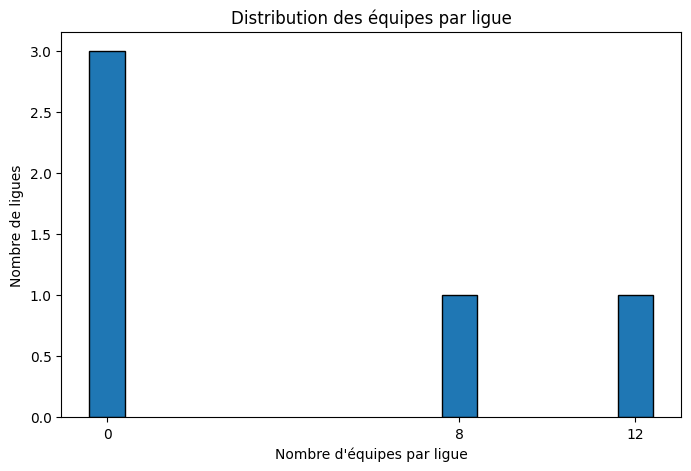

In [24]:
import matplotlib.pyplot as plt

# Compter combien de ligues ont chaque nombre d'équipes
team_counts = df_leagues["num_teams"].value_counts().sort_index()
print(team_counts)

plt.figure(figsize=(8,5))
plt.bar(team_counts.index, team_counts.values, edgecolor="black")

plt.xlabel("Nombre d'équipes par ligue")
plt.ylabel("Nombre de ligues")
plt.title("Distribution des équipes par ligue")

plt.xticks(team_counts.index)  # Pour s'assurer que tous les nombres d'équipes apparaissent sur l'axe
plt.show()


In [18]:
# Affichage du nombre total de ligues
print(f"Nombre total de ligues disponibles: {df_leagues.shape[0]}\n")

Nombre total de ligues disponibles: 5



In [21]:
# Récupération des équipes
teams = client.list_teams()
teams

[Team(league_id=5001, team_id=1001, team_name='Roaring Kitties', last_changed_date=datetime.date(2024, 4, 23), players=[PlayerBase(player_id=1001, gsis_id='00-0023459', first_name='Aaron', last_name='Rodgers', position='QB', last_changed_date=datetime.date(2024, 4, 18)), PlayerBase(player_id=1002, gsis_id='00-0023853', first_name='Matt', last_name='Prater', position='K', last_changed_date=datetime.date(2024, 4, 18)), PlayerBase(player_id=1003, gsis_id='00-0024243', first_name='Marcedes', last_name='Lewis', position='TE', last_changed_date=datetime.date(2024, 4, 18)), PlayerBase(player_id=1007, gsis_id='00-0026293', first_name='Matt', last_name='Slater', position='WR', last_changed_date=datetime.date(2024, 4, 18)), PlayerBase(player_id=1014, gsis_id='00-0027944', first_name='Julio', last_name='Jones', position='WR', last_changed_date=datetime.date(2024, 4, 18)), PlayerBase(player_id=1018, gsis_id='00-0028063', first_name='Taiwan', last_name='Jones', position='RB', last_changed_date=date

In [22]:
# Extraction des données des équipes
teams_data = [
    {
        "league_id": team.league_id,
        "team_id": team.team_id,
        "team_name": team.team_name,
        "last_changed_date": team.last_changed_date,
        "num_players": len(team.players)
    }
    for team in teams
]

# Création du DataFrame
df_teams = pd.DataFrame(teams_data)
df_teams.head()

,league_id,team_id,team_name,last_changed_date,num_players
0,5001,1001,Roaring Kitties,2024-04-23,7
1,5001,1002,Pigskin Party,2024-04-23,7
2,5001,1003,Dallas Steers,2024-04-23,7
3,5001,1004,Never Gonna Give Up,2024-04-23,7
4,5001,1005,Fighting Catfish,2024-04-23,7


In [23]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   league_id          20 non-null     int64 
 1   team_id            20 non-null     int64 
 2   team_name          20 non-null     object
 3   last_changed_date  20 non-null     object
 4   num_players        20 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 932.0+ bytes


In [28]:
players = client.list_players()
players

[Player(player_id=1001, gsis_id='00-0023459', first_name='Aaron', last_name='Rodgers', position='QB', last_changed_date=datetime.date(2024, 4, 18), performances=[Performance(performance_id=2501, player_id=1001, week_number='202301', fantasy_points=20.0, last_changed_date=datetime.date(2024, 3, 1)), Performance(performance_id=3519, player_id=1001, week_number='202302', fantasy_points=9.0, last_changed_date=datetime.date(2024, 3, 1)), Performance(performance_id=4537, player_id=1001, week_number='202303', fantasy_points=22.0, last_changed_date=datetime.date(2024, 3, 1)), Performance(performance_id=5555, player_id=1001, week_number='202304', fantasy_points=5.0, last_changed_date=datetime.date(2024, 3, 1)), Performance(performance_id=6573, player_id=1001, week_number='202305', fantasy_points=1.0, last_changed_date=datetime.date(2024, 3, 1)), Performance(performance_id=7591, player_id=1001, week_number='202306', fantasy_points=25.0, last_changed_date=datetime.date(2024, 3, 1)), Performance(p